# Lattice Dynamics and Density Functional Perturbation Theory - Quasi-Harmonic Level

The script 'thermodyanmics.py' is a comprehensive module for lattice dynamics based on harmonic and quasi-harmonic level of theory. For simplicity, this tutorial is focused only on quasi-harmonic fittings of phonons and thermodynamics of that level. For harmonic part, please refer to 'thermodynamics-QHA'.

**Classes used in this tutorial are defined in 'CRYSTALpytools.thermodynamics'. Documentations and source codes are attached at the bottom of this page.**

## Tests
2 tests are performed based on the same method.

* 0 pressure, 0\~330K equilibrium volumes of Form I paracetamol. Compared with experimental measurements ([C. C. Wilson, *Z. Kristallogr. Cryst. Mater.*, 2000, **215**, 693–701](https://www.degruyter.com/document/doi/10.1524/zkri.2000.215.11.693/html)).  
* 0\~1GPa, 0\~330K thermodynamic properties of Form I paracetamol. As an illustration of the complete output file. 

1 test is performed to illustrate the compatibility with QHA output.

* 0\~1GPa, 0\~1000K thermal expansions of corundum. QHA output available on [crystal tutorial website](https://tutorials.crystalsolutions.eu/tutorials/Tutorial_QHA/AL2O3_SC30_QHA.out).

Another test is performed to illustrate the fitting of EoS rather than mode-specific fittings

* 0\~1GPa, 0\~330K thermodynamic properties of Form I paracetamol. For comparison with mode-specific options

Mode-specific method explanation:

1. Analytical expression of electron total energy is fitted to the third-order Birch-Murnaghan equation of states.  
2. Analytical expression of phonon frequencies is fitted to the second- and third-order polynomials. The third -order polynomial is used for thermodynamics.  
3. Gibbs free energy G(T, p) is minimized with BFGS algorithm without boundary conditions or L-BFGS-B with boundary conditions

**N.B.** This module is still under development. Planned update: Gruneisen model and anisotropic thermal expansion.

EoS fitting method explanation:

1. Helmholtz free energy is computed at HA level for each sampled HA system
2. EoS is fitted according to sampled F, V to get $F(V; T)$
3. $p=-\left(\frac{\partial F}{\partial V}\right)_{T}$ is numerically solved to get the equilibrium volume at given pressure p
4. $G(T; p)$ is fitted to get entropy: $S=-\left(\frac{\partial G}{\partial T}\right)_p$

### 0\~330K, 0 pressure thermodyanmics
This part is used for comparison with experimental measurements, in order to illustrate effectiveness of QHA method implemented here. 4 $\Gamma$-point phonon calculations of Form I paracetamol with various volumes are used ('QHA' folder in 'data/').

In [1]:
import numpy as np
from CRYSTALpytools.thermodynamics import Quasi_harmonic

file_list = ['data/QHA/f1-m4freq.out', 'data/QHA/f1-p4freq.out',
             'data/QHA/f1-p8freq.out', 'data/QHA/f1-r0freq.out']
tempt = np.array([20, 50, 80, 150, 200, 250, 330], dtype=float)

press = np.linspace(0, 1, 5)

qha = Quasi_harmonic(write_out=True, filename='data/f1-thermo-QHA.dat').from_HA_files(file_list, overlap=0.4)
qha.thermo_freq(temperature=tempt, pressure=press, eos_method='birch_murnaghan', 
                poly_order=[2, 3], min_method='BFGS')

/work/e89/e89/hyz20ic/apps/anaconda3/envs/crystal_py3.9/lib/python3.9/site-packages/CRYSTALpytools/thermodynamics.py:876: UserWarning: Close overlap of phonon modes detected at qpoint:   0,    154 overlaps out of    240 modes.
  self.combined_mode = self._combine_data(ha_list, overlap=overlap,
/tmp/ipykernel_3707/2560457534.py:11: UserWarning: Optimised volume exceeds the sampled range. Special care should be taken of.
  qha.thermo_freq(temperature=tempt, pressure=press, eos_method='birch_murnaghan',
/tmp/ipykernel_3707/2560457534.py:11: UserWarning:   Volume:     800.9631, Temperature: 330.00, Pressure:   0.00
  qha.thermo_freq(temperature=tempt, pressure=press, eos_method='birch_murnaghan',
/tmp/ipykernel_3707/2560457534.py:11: UserWarning:   Volume:     729.3391, Temperature:  20.00, Pressure:   0.75
  qha.thermo_freq(temperature=tempt, pressure=press, eos_method='birch_murnaghan',
/tmp/ipykernel_3707/2560457534.py:11: UserWarning:   Volume:     729.8548, Temperature:  50.00, Pressu

Warning messages are printed out since the fitted volume data exceeds the sampled volume data, which might cause inaccuracies due to the extrapolated volume & phonon frequencies. According to warning messages, smaller volumes should be sampled when generating the phonon frequency data. However, tests show that moderate extrapolation tend to not severely deteriorate the results, therefore, a warning, instead of an error, is used.

No warning message is printed out for 0 pressure thermodynamics. Fitted data and expermiental data are plotted for comparison in the following code block. The difference is <= 5 cm^3/mol, which is a good agreement with experimental measurements. The increased thermal expansion around 50\~150K is reproduced.

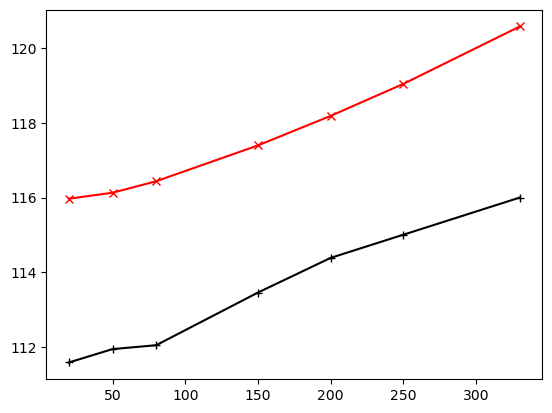

In [2]:
import matplotlib.pyplot as plt

exp = np.array([111.5836, 111.9421, 112.0463, 113.4580, 114.3871, 
                115.0082, 116.0031])
qha_zerop = qha.equilibrium_volume[0, :]
# Angstrom^3 to cm^3/mol
qha_zerop = qha_zerop * 0.602214 / 4

plt.plot(tempt, exp, '+-k')
plt.plot(tempt, qha_zerop, 'x-r')
plt.show()

### 0\~330K, 0\~1GPa thermodyanmics
The format of the output file obtained from the previous calculation (f1-thermo-QHA.dat) is briefly explained in this section. Generally speaking, titles of each section are printed in upper case, with '\#' at the beginning of the line. Brief explanations, if necessary, are given in the following lines in the lower case. 

Following information is reported in sequence:

#### Combined HA phonon data

1. Volumes of sampled HA phonons  
2. DFT total energies of sampled HA phonons  
3. Mode frequencies as functions of volumes

```
# COMBINED QHA DATA
## SAMPLED VOLUMES(ANGSTROM^3) =
## DFT TOTAL ENERGIES(KJ/MOL CELL) =
## DFT TOTAL ENERGIES(KJ/MOL CELL) =

## COMBINED MODES

### FREQUENCIES AT QPOINT #

  Mode #    Volume(Angstrom^3)        Frequency(THz)
```

#### Overlaps of phonon modes

Phonon frequencies are sorted to give smooth $\omega(V)$ for polynomial fittings. Reference: [A. Erba, *J. Chem. Phys.*, 2014, **141**, 124115.](https://aip.scitation.org/doi/full/10.1063/1.4896228)

The scalar product of corresponding eigenvectors normalized to 1 between two calculations (Calc 1 and 2) should not be smaller than 0.4.

Calc_Ref: The previous calculation, Calc 1

Calc_Sort: The next calculation, Calc 2

```
## CLOSE OVERLAPS OF PHONON FREQUENCIES

### CLOSE OVERLAPS AT QPOINT #

  Calc_Ref  Mode_Ref  Calc_Sort  Mode_Sort
```

#### Equation of states fitted for DFT total energy
To get the analytical expression of internal energy as the function of volume, U(V), excluding the zero point energy, the DFT total energy is fitted to equation of states (EoS) specified. The [pymatgen.analysis.eos module](https://pymatgen.org/pymatgen.analysis.eos.html) is integrated, so EoSs supported there are supported here as well. 

The following parameters are fitted:

1. $E_{0}$, The equilibrium internal energy excluding phonon vibrations.  
2. $V_{0}$, The equilibrium volume fitted to minimize the internal energy. Compared to $V_{0}$ that minimizes Gibbs free energy, there is a famous 'volume shift' problem of this value.  
3. $B_{0}$, The equilibrium bulk modulus.  
4. $B_{1}=\left(\frac{\partial B_{0}}{\partial p}\right)_{T}$

```
# EQUATION OF STATES FITTED FOR ELECTRON TOTAL ENERGY: birch_murnaghan
  Electron total energy is fitted as the function of volume, of which the
  formalism is given by equation of states.

      E0(kJ/mol)  V0(Angstrom^3)     B0(GPa)          B1
```

#### Polynomial fit of phonon frequency
The polynomial fitting of phonon frequency as the function of volume based on perturbation, $\Delta\omega(V-V_{0})$, is implemented. 

Two sub-sections are printed. The first sub-section is printed during the fitting. The following parameters are printed for future evaluation:

1. Mode number  
2. Order of polynomial  
3. The fitting goodness R^2. $r^{2}=1-\frac{\sigma_{res}}{\sigma_{tot}}=1-\frac{\sum^{n}\left(\omega_{i}^{0}-\omega_{i}^{fit}\right)^{2}}{\sum^{n}\left(\omega_{i}^{0}-\bar{\omega^{0}}\right)^{2}}$  
4. Coefficients of the polynomial. Listed from left to the right from the 0-order term to the highest order term

```
# POLYNOMIAL FIT OF MODE FREQUENCY
  Frequency of each vibrational mode is fitted as the polynomial function of
  volume, with specified orders of power.

## POLYNOMIAL FIT AT QPOINT #
  Mode #  Order           R^2  Coeff low to high
```

The second sub-section is printed out after finishing all the fittings. The overall fitting goodness (the average of R^2 of all modes) at each q point is collected for comparison. 

```
## POLYNOMIAL FIT GOODNESS AT QPOINT #       
  Order           R^2
```

#### QHA thermodynamic properties

Basic thermodynamic properties including equilibrium volumes $V(T,p)$, Helmholtz free energy $F(T,V)$, Gibbs free energy $G(T,p)$ and entropy $S(T,V)$ are printed out at finite temperatures and pressures. 

So far, $V(T,p)$ is the basic quantity of all the other thermodynamic properties, which is obtained by numerically minimizing the Gibbs free energy of harmonic phonons (see [thermo-HA](https://github.com/crystal-code-tools/CRYSTALpytools/blob/main/tutorial/thermo-HA.ipynb) for analytical equations). 

The following information is printed out:

1. The order of polynomials used for QHA thermodynamics, which is automatically chosen based on the average R^2.  
2. Algorithm used for minimizing Gibbs free energy.  
3. If applicable, volume boundaries set for Gibbs free energy minimization.  
4. Thermodynamic properties at constant pressure.

```
# QHA THERMODYNAMIC PROPERTIES
  Thermodynamic properties fitted by QHA.

## FREQUENCY POLYNOMIAL ORDER:
## EQUILIBRIUM VOLUME MINIMISATION: 
## THERMODYNAMIC PROPERTIES AT         GPa

      T(K)     Vol(Angstrom^3)   Helmholtz(kJ/mol)       Gibbs(kJ/mol)    Entropy(J/mol*K)
```

### 0\~1000K, 0\~1GPa thermal expansion of corundum

This test is to illustrate the compability of CRYSTALpytools with QHA output from CRYSTAL. Due to the finite changes in volume, the interation cut-off threshold might change with the geometry, leading to noises on the potential energy surface. See 'FIXINDEX' in CRYSTAL manual. Therefore, to obtain a smooth energy surface, QHA output, rather than multiple HA outputs, is always preferred. 

/work/e89/e89/hyz20ic/apps/anaconda3/envs/crystal_py3.9/lib/python3.9/site-packages/CRYSTALpytools/thermodynamics.py:998: UserWarning: Close overlap of phonon modes detected at qpoint:   0,     34 overlaps out of     90 modes.
  self.combined_mode = self._combine_data(ha_list, overlap=overlap,


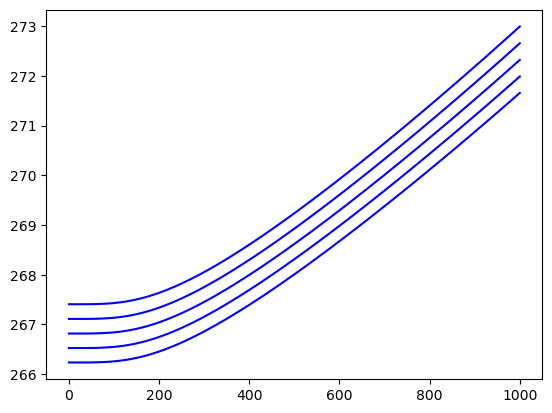

In [3]:
import numpy as np
from CRYSTALpytools.thermodynamics import Quasi_harmonic
import matplotlib.pyplot as plt

file = 'data/corundum.out'
tempt = np.linspace(0, 1000, 101)
press = np.linspace(0, 1, 5)

qha = Quasi_harmonic(write_out=False).from_QHA_file(file)
qha.thermo_freq(temperature=tempt, pressure=press, eos_method='birch_murnaghan', 
                poly_order=[3], min_method='BFGS')

for v_p in qha.equilibrium_volume:
    plt.plot(tempt, v_p, '-b')
    
plt.show()

### EoS fitting

This test is to illustrate the procedure to fit a series of adiabatic equation of states to avoid mode-specific fittings and calculations, which might be useful for large systems with low symmetry.

**About EOS input format**

Inputs of EOS is constant with the [PyMatGen.analysis.eos module](https://pymatgen.org/pymatgen.analysis.eos.html), including: 

1. `eos_method` Name of EoS
2. `order` `min_ndata_factor` `max_poly_order_factor` `min_poly_order=2` Extra parameters of polynomial based EoSs

Note that due to the problem of pymatgen EOSBase object (by v2023.1.20), varying the extra parameter to fit polynomial-based EoSs (DeltaFactor, NumericalEOS) is currently impossible. Refer to the source code ['pymatgen/analysis/eos.py'](https://github.com/materialsproject/pymatgen/blob/v2023.1.20/pymatgen/analysis/eos.py#L450-L550) for more information. Lines assigning the parameters are commented in CRYSTALpytools/thermodynamics.py

In [4]:
import numpy as np
from CRYSTALpytools.thermodynamics import Quasi_harmonic
import time

file_list = ['data/QHA/f1-m4freq.out', 'data/QHA/f1-p4freq.out',
             'data/QHA/f1-p8freq.out', 'data/QHA/f1-r0freq.out']
tempt = np.array([20, 50, 80, 150, 200, 250, 330], dtype=float)
press = [0.]

tbg = time.perf_counter()
# Mode-specific
mode = Quasi_harmonic(write_out=False).from_HA_files(file_list, overlap=0.4)
mode.thermo_freq(temperature=tempt, pressure=press, 
                 eos_method='birch_murnaghan', 
                 poly_order=[3], min_method='BFGS', mutewarning=True)

tmode = time.perf_counter()
# EoS
eos = Quasi_harmonic(write_out=False).from_HA_files(file_list, sort_phonon=False)
eos.thermo_eos(temperature=tempt, pressure=press, 
               eos_method='birch_murnaghan', 
               poly_order=[3], mutewarning=True)

teos = time.perf_counter()
print('Time consumption for Mode-Specific fitting: %12.6f s' % (tmode - tbg))
print('Time consumption for EoS fitting: %12.6f s' % (teos - tmode))

/work/e89/e89/hyz20ic/apps/anaconda3/envs/crystal_py3.9/lib/python3.9/site-packages/CRYSTALpytools/thermodynamics.py:876: UserWarning: Close overlap of phonon modes detected at qpoint:   0,    154 overlaps out of    240 modes.
  self.combined_mode = self._combine_data(ha_list, overlap=overlap,


Time consumption for Mode-Specific fitting:    62.449942 s
Time consumption for EoS fitting:    56.661545 s


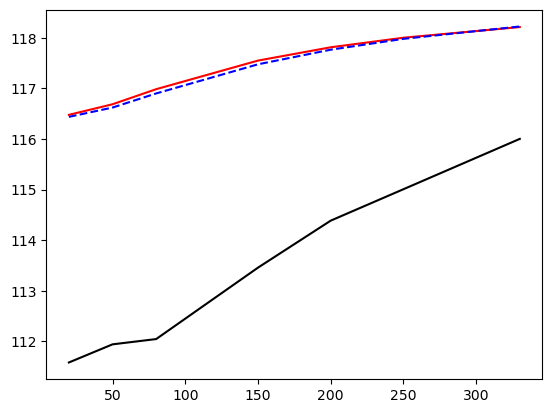

In [5]:
import matplotlib.pyplot as plt

exp = np.array([111.5836, 111.9421, 112.0463, 113.4580, 114.3871, 
                115.0082, 116.0031])
plt.plot(tempt, exp, '-k')
# Angstrom^3 to cm^3/mol
vol_mode = mode.equilibrium_volume[0, :] * 0.602214 / 4
vol_eos = eos.equilibrium_volume[0, :] * 0.602214 / 4
plt.plot(tempt, vol_mode, '-r')
plt.plot(tempt, vol_eos, '--b')

plt.show()

It should be noted that entropy $S(V, T)$ is fitted from $S=-\left(\frac{\partial G}{\partial T}\right)_{p}$, making it less accurate compared to mode-specific fittings. See the table below. 

**0 Pressure entropy**

| T (K) | S - $\omega(V)$ (J.mol$^{-1}$.K$^{-1}$)  | S - EoS (J.mol$^{-1}$.K$^{-1}$) | F - $\omega(V)$ ($\times 10^{6}$ kJ.mol$^{-1}$) | F - EoS ($\times 10^{6}$ kJ.mol$^{-1}$)|
|:--- |:------:|:------:|:---------:|:--------- |
| 20  | 13.14  |   7.57 | -5.400699 | -5.400699 |
| 50  | 96.47  | 100.96 | -5.400700 | -5.400700 |
| 80  | 192.79 | 190.78 | -5.400705 | -5.400705 |
| 150 | 388.65 | 386.49 | -5.400725 | -5.400725 |
| 200 | 512.33 | 514.39 | -5.400748 | -5.400748 |
| 250 | 629.85 | 632.39 | -5.400776 | -5.400776 |
| 330 | 810.85 | 800.58 | -5.400834 | -5.400834 |